<a href="https://colab.research.google.com/github/tetiana-martynenko/Python-For-DS/blob/main/%22hw_4_3_%D0%A0%D0%BE%D0%B1%D0%BE%D1%82%D0%B0_%D0%B7_DataFrame_%D0%94%D1%96%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%B0_%D1%80%D0%BE%D0%B7%D1%81%D1%96%D1%8E%D0%B2%D0%B0%D0%BD%D0%BD%D1%8F_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому ДЗ ми потренуємось будувати візуалізації з використанням бібліотеки `maplotlib` для візуалізації даних в `pandas.DataFrame`.

# Опис бізнес задачі та набору даних

Набір даних "Yulu" містить інформацію про попит на спільні електровелосипеди в Індії, що надаються провідним індійським постачальником мікромобільності Yulu. Ця компанія пропонує унікальні транспортні засоби для щоденних поїздок з метою усунення транспортних заторів в Індії та забезпечення безпечного, зручного та доступного рішення для пересування. Зони Yulu розташовані в оптимальних місцях, включаючи станції метро, автобусні зупинки, офісні простори, житлові райони та корпоративні офіси, щоб полегшити поїздки на перші та останні кілометри.

Останнім часом Yulu зіткнулася зі значними зниженнями доходів, тому компанія звернулася до консалтингової фірми з метою зрозуміти, від яких факторів залежить попит на ці спільні електровелосипеди, особливо на індійському ринку.

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

1. Завантажте дані з файла `yulu_rental.csv` у pandas.DataFrame `df`.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DS_course/data/yulu_rental.csv')

2. Виведіть

- перші 3 записи з набору даних
- типи даних в наборі даних
- розміри набору даних

In [4]:
display(df[:3])

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [5]:
display(df.dtypes)

,0
datetime,object
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


In [6]:
total_bytes = df.memory_usage()
total_mg = total_bytes.sum()/(1024**2)
print(f'Розмір набору даних складає {round(total_mg, 3)} мегабайт')

Розмір набору даних складає 0.997 мегабайт


Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.
Наша колонка тепер стане таймпстемпом і для неї став доступний функціонал, описаний тут

https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.html

Наприклад, ми можемо легко виокремити дату, день тижня, чи це робочий день, чи ні.

In [7]:
df['datetime'] = pd.to_datetime(df.datetime)


3. З допомогою matplotlib побудуйте найпростіший лінійний графік кількості зареєстрованих користувачів (`registered`) на кожну годину.

In [8]:
reg_hour = df.datetime
reg_user = df.groupby(reg_hour)['registered'].sum()

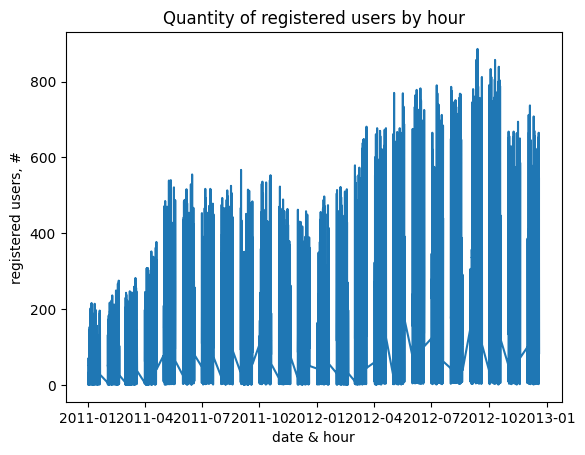

In [9]:
plt.plot(reg_user);
plt.title("Quantity of registered users by hour")
plt.xlabel("date & hour")
plt.ylabel("registered users, #");

Має вийти щось таке:
![](https://drive.google.com/uc?export=view&id=1WX6s9qmiwq_1TSHQtRX0bPL8sT6Gw2BH)

4. Графік виглядає так собі, правда? Давайте загрегуємо дані по дням. Для цього запустіть наступний код аби створити колонку "дата" (без часу) і після цього напишіть самостійно код, аби загрегувати дані і отримати кількість зарестрованих клієнтів на день. Ваша фінальна структура (запишіть її в змінну `df_registered_by_date`) даних має містити дві колонки: дату і кількість зареєстрованих користувачів на цей день.

In [10]:
df['date'] = df.datetime.dt.date

In [11]:
df_registered_by_date = df.groupby('date')['registered'].sum()

In [12]:
df_registered_by_date

,registered
date,
2011-01-01,654
2011-01-02,670
2011-01-03,1229
2011-01-04,1454
2011-01-05,1518
...,...
2012-12-15,4280
2012-12-16,3248
2012-12-17,4373


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1DL7Y-R7_CBWNlQNAnMyAoU8hR2MdF5v7)


5. Тепер побудуйте лінійний графік з matplotlib для даних в `df_registered_by_date`.

  Додайте наступну частину до графіку аби зробити підписи за віссю ОХ більш читаємими

  `plt.xticks(rotation=45, ha='right')`

  Після побудови графіку проаналізуйте його та напишіть, які тенденції щодо зміни кількості зареєстрованих користувачів в часі ви бачите і чому так може бути?

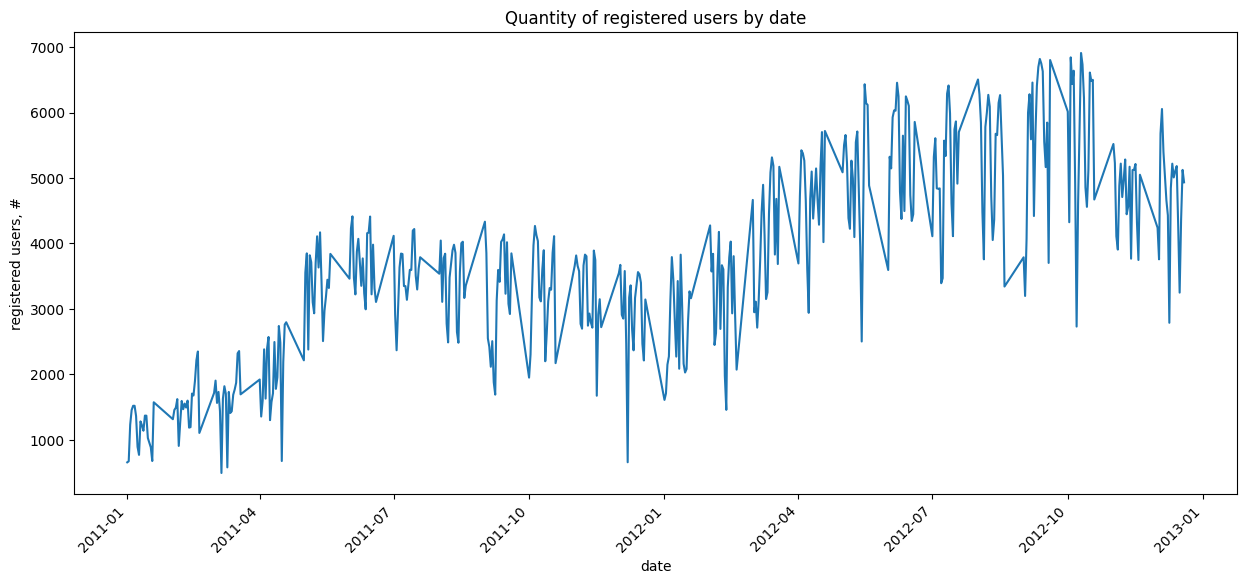

In [13]:
plt.figure(figsize=(15, 6))
plt.plot(df_registered_by_date)
plt.xticks(rotation=45, ha='right')
plt.title("Quantity of registered users by date")
plt.xlabel("date")
plt.ylabel("registered users, #");

Висновки:
відповідно отриманих даних спостерігається позитивна тенденція розвитку й к-ті клієнтів, відносно 2011 року. Тобто бренд розвивається та збільшується кількість клієнтів.
Також варто зазначити, що літо та осінь - пікові сезоні, в той час як зима - просідає. Це можна пояснити погодними умовами, що не сприяють використання відкритих транспортних засобів, в даному випадку - електровелосипедів.
З огляду на те, що пікові години - 8 ранку та 6 вечора - користувачі обирають даний бренд для добирання до та з роботи.

6. Побудуйте графік розсіювання (scatterplot) між температурою і тим, як вона відчувається (atemp). Поставте прозорість точок 0.2. Додайте підписи до осей Х ат У. Опишіть свої спостереження з цього графіку. Які висновки можна зробити? Що дивного бачите?

In [13]:
col_x = 'sepal length (cm)'
col_y = 'sepal width (cm)'
color_feature = 'petal length (cm)'

plt.figure(figsize=(8,4))
plt.scatter(iris_df[col_x], iris_df[col_y], alpha=0.2,
            s=100*iris_df[color_feature], c=iris.target)
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.colorbar();

Висновки:
між фактичною та відчутною температурою спостерігається лінійна залежність. Найбільш часта температура 5-15 та 25-35 градусів. Відхилення(25-25 градусів, що сприймаються як 12) - можна припустити, що викликані аномальними відхиленнями таких показників як вологість, вітер.
Також у межах 15-25 градусів температура не сприймається як фактична, а вищою.

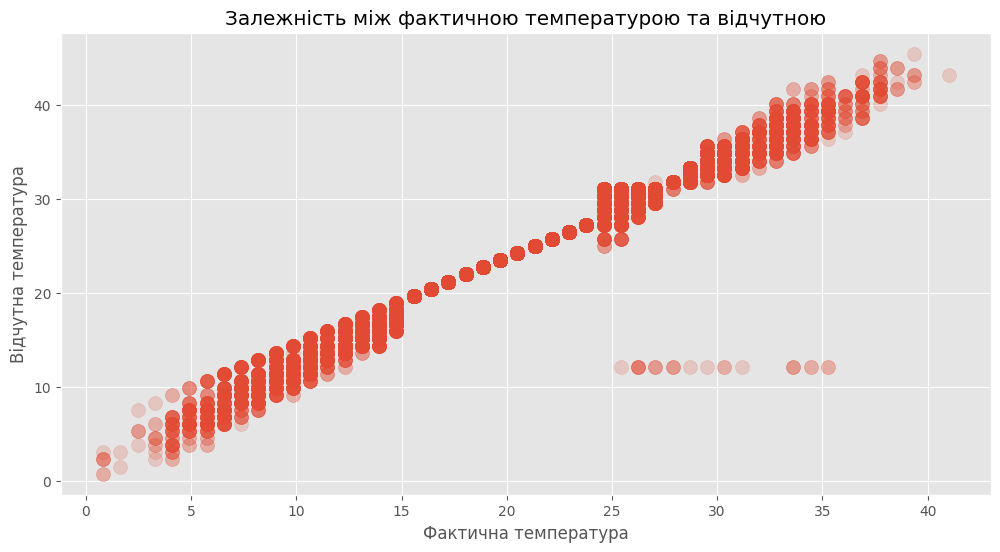

In [31]:
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
plt.scatter(df.temp, df.atemp, alpha=0.2, s = 100)
plt.title("Залежність між фактичною температурою та відчутною")
plt.xlabel("Фактична температура")
plt.ylabel("Відчутна температура");

  Очікуваний графік:
![](https://drive.google.com/uc?export=view&id=13Mi6AGPUh5aQ5YEZjrlkQPuFcNzeeppB)
